# Econometrics I

At long last we have reached Econometrics I! Here you'll get a sense of how to actually run regressions in R using real data. We'll also cover visualising results as we go. The topics we cover in this notebook are:

- <a href='#The Bivariate Regression'>The Bivariate Regression</a>  <a id='The Bivariate Regression'></a>
-   <a href='#Ordinary Least Squares'>Ordinary Least Squares</a>
-   <a href='#Regression Coefficients'>Regression Coefficients</a>
-  <a href='#Significance of Coefficients'>Significance of Coefficients</a>
- <a href='#R^2'>R$^2$</a>
- <a href='#Log Regressions'>Log Regressions</a>
-  <a href='#Multivariate Regression'>Multivariate Regression</a>
-  <a href='#Adjusted R^2'>Adjusted R$^2$</a>
-  <a href='#Dummy Variables'>Dummy Variables</a>
- <a href='#Interactions'>Interactions</a>
-  <a href='#t-tests'>t-tests</a>
-  <a href='#F-tests'>F-tests</a>

This is our first true 'hands-on' notebook. By that we mean the entire notebook is dedicated to analysing a real dataset we can download online. No more raw theory - everything is applied. So let's start by loading our data into R. The dataset we will use throughout this notebook is a dataset containing information on all the countries of the world:

In [1]:
data<-read.csv('https://github.com/hands-on-econ/Hands-On-Econ/raw/master/Datasets/countries%20of%20the%20world.csv')

In [2]:
head(data,10)

Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",,,
Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900,"42,0","7,8","2,41","0,24","97,35",,"45,11","24,2","0,096","0,658","0,246"
Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"


In [3]:
colnames(data)

[1] "Country"                            "Region"                            
 [3] "Population"                         "Area..sq..mi.."                    
 [5] "Pop..Density..per.sq..mi.."         "Coastline..coast.area.ratio."      
 [7] "Net.migration"                      "Infant.mortality..per.1000.births."
 [9] "GDP....per.capita."                 "Literacy...."                      
[11] "Phones..per.1000."                  "Arable...."                        
[13] "Crops...."                          "Other...."                         
[15] "Climate"                            "Birthrate"                         
[17] "Deathrate"                          "Agriculture"                       
[19] "Industry"                           "Service"

### The Bivariate Regression <a id='The Bivariate Regression'></a>

The Bivariate regression is the simplest regression we can run and as its name implies it involves us regressing one variable on another. Before we go further we introduce some important vocabulary and conventions. The variable on the left hand side of our regression is called our dependent variable, or $y$ variable. If you ever forget this just remember that the whole regression depends on this variable. Without it we could have no regression. The variable(s) on the right hand side of our regression are called the independent variables, or $x$ variables. Moreover when we say we regress a variable *on* another we are referring to a $y$ variable and an $x$ variable in that order. For example in the regression: `Population`$=\alpha + \beta \times$ `Area..sq..mi..`$+\epsilon_i$ we are regressing the variable `Population` on the variable `Area..sq..mi..`. Let's do this regression using the `lm(y~x)` command and calling its `coefficients` attribute:

In [4]:
lm(data[,'Population']~data[,'Area..sq..mi..'])$coefficients

(Intercept) data[, "Area..sq..mi.."] 
            1.022585e+07             3.094884e+01

So our regression is: `Population`$_i$ $=10225851 +  30.95   \times$ `Area..sq..mi..`$_i$ $+\epsilon_i$


What does this mean? Well put simply the Bivariate regression gives us the change in the $y$ variable associated with a one unit change in the $x$ variable. So the above example shows us that each extra square mile of area is associated with an extra 30.95 people per country. So a country with an area of effectively 0 is expected to have a population of roughly 10,000,000 people. Does this make sense? Well to start with all countries have some area so clearly not, but even if we consider countries with very small areas we still can see this makes not a lot of sense: 

In [5]:
data[data[,'Country']=='Monaco ','Area..sq..mi..']

[1] 2

In [6]:
data[data[,'Country']=='Monaco ','Population']

[1] 32543

So we're around 9,965,000 Monegasques short of our predicted population of Monaco! We've included a constant in this regression, so maybe that's our problem:

In [7]:
lm(data[,'Population']~data[,'Area..sq..mi..']+0)$coefficients

data[, "Area..sq..mi.."] 
                 32.6726

Now we expect Monaco to have a population of a little over 65! Not 65,000; 65! The worst part? This is not a randomness problem. Every single time we run this regression we will get exactly the same result. To make more sense of why and why these results are actually exactly how we expect them to be we need to consider Ordinary Least Squares (OLS).

 ### Ordinary Least Squares<a id='Ordinary Least Squares'></a>



OLS is the technique by which we attained our previous coefficients and the way which we will keep doing so for the next 2 notebooks. In Econometrics IIII we'll see some alternatives to OLS but for now we're well and truly stuck with it. So how does OLS work? In essence it finds the **least squares**, hence the name. Least squares of what? Residuals! What's a residual again? The difference between the predicted value and the actual value! Mathematically the OLS estimator $\hat{\beta}$ is the solution to the minimisation problem: $argmin_\hat{\beta} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2$, or essentially the value of $\hat{\beta}$ which makes $\sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2$ as small as possible. Likewise the OLS constant $\hat{\alpha}$ is the value of $\alpha$ which makes $\sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2$ as small as possible. We refer to $\sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2$ as our 'sum of squared residuals', a concept we'll revisit in <a href='#R^2 and Adjusted-R^2'>R$^2$ and Adjusted-R$^2$</a>. Of course if we didn't have a constant then $\hat{\beta}$ would be the solution to the minimisation problem: $argmin_\hat{\beta} \sum\limits_{i=1}^{n}(y_i -\hat{\beta} x_i)^2$.

Before we go any further let's something up. You should already know this but a variable with a 'hat' over it like $\hat{\beta}$ is an 'estimate' and one without a hat is a population value. Our job with regression analysis is to estimate the true parameters as well as possible because in reality we can never know these for sure. It may seem strange to do for this regression given our population is literally just our data, but we keep with the standard notation to establish the convention for later regressions. 

So what's this got to do with Monaco? Well the answer is we actually don't really care about Monaco (sorry Monaco)! We care about *residuals*. In a way this is a kind of 'greater good' approach. We don't care about any one observation, only the total amount of squared residuals. Of course one outlier could affect our regression significantly but we still would be just trying to minimise our total squared residuals. At this point it's probably useful to have a look at our data. We introduce the `scale_x_continuous(labels = comma)` command and its $y$ counterpart to make sure we have commas in our axes:

Loading required package: scales


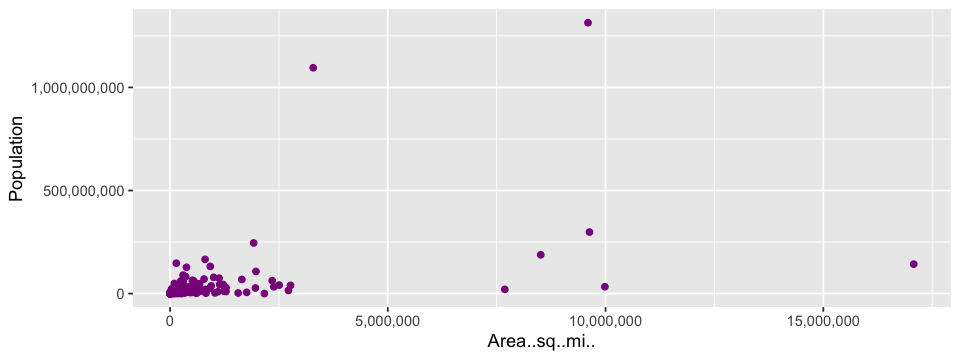

In [8]:
options(repr.plot.width=8, repr.plot.height=3)
library(ggplot2)
options(scipen=1000)
require(scales)
ggplot(data, aes(Area..sq..mi..,Population))+geom_point(colour='magenta4')+
scale_x_continuous(labels = comma)+scale_y_continuous(labels = comma)

It should be pretty clear who the seven 'outlier' countries are. As for most of the other countries, it's a lot harder. What do our regressions look like? Let's see:

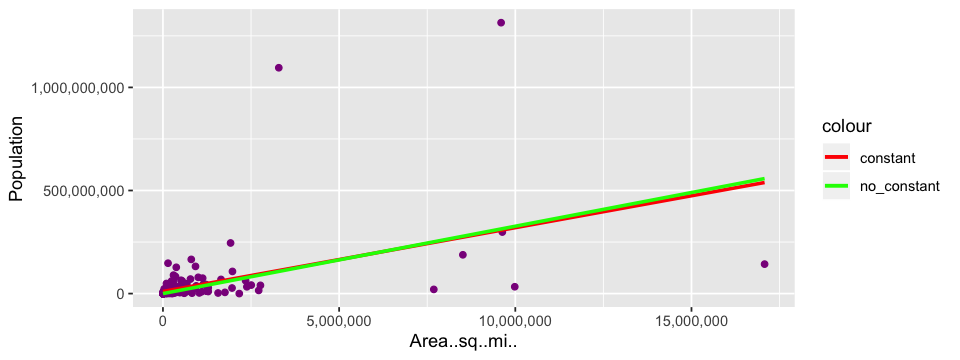

In [9]:
ggplot(data, aes(Area..sq..mi..,Population))+geom_point(colour='magenta4')+
scale_x_continuous(labels = comma)+scale_y_continuous(labels = comma)+geom_smooth(method='lm',se=F,aes(color='constant'))+
geom_smooth(method='lm',formula=y~x-1,se=F,aes(color='no_constant'))+scale_colour_manual(values=c(constant="red",no_constant="green"))

As we can see our constant/no-constant regressions look remarkably similar. This makes sense because for our huge outlier countries (India and China) 10,000,000 people really have no major effects. If we want a better understanding of this we need to consdier our regression coefficients in more detail.

   ### Regression Coefficients <a id='Regression Coefficients'></a>



We've already seen what our $\hat{\alpha}$ and $\hat{\beta}$ variables are *minimising* but we still don't really know what they *are*. For that we need to actually solve these minimisation problems. We'll start with $\hat{\alpha}$:

$argmin_\hat{\alpha} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2\equiv \dfrac{\mathrm d}{\mathrm d \hat{\alpha}} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2 =0$

$\dfrac{\mathrm d}{\mathrm d \hat{\alpha}} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2 =
-2\sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)=0$

So $\sum\limits_{i=1}^{n}\hat{\alpha}=n\hat{\alpha}=\sum\limits_{i=1}^{n}(y_i-\hat{\beta} x_i)$

and $\hat{\alpha}=\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{\beta} x_i)=\bar{y}-\hat{\beta}\bar{x}$

We skip the working for $\hat{\beta}$ but it is fairly straightforward to show $\hat{\beta}=\dfrac{\sum\limits_{i=1}^{n}(y_i-\bar{y})(x_i-\bar{x})}{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}=\dfrac{Cov(X,Y)}{Var(X)}$ which we can see below:

In [10]:
b_hat<-cov(data[,'Population'],data[,'Area..sq..mi..'])/var(data[,'Area..sq..mi..'])
b_hat

[1] 30.94884

In [11]:
lm(data[,'Population']~data[,'Area..sq..mi..'])$coefficients[2]

data[, "Area..sq..mi.."] 
                30.94884

In [12]:
a_hat<-mean(data[,'Population'])-b_hat*mean(data[,'Area..sq..mi..'])
a_hat

[1] 10225852

In [13]:
lm(data[,'Population']~data[,'Area..sq..mi..'])$coefficients[1]

(Intercept) 
   10225852

So when we have a constant this is what we can expect our regression coefficient and constant to look like. What about when we don't have one? Well in this case we solve:

$argmin_\hat{\beta} \sum\limits_{i=1}^{n}(y_i-\hat{\beta} x_i)^2\equiv \dfrac{\mathrm d}{\mathrm d \hat{\beta}} \sum\limits_{i=1}^{n}(y_i-\hat{\beta} x_i)^2 =0$ 

so $\hat{\beta}=\dfrac{\sum\limits_{i=1}^{n}x_iy_i }{\sum\limits_{i=1}^{n}x_i^2}$ 

We need to use `as.numeric()` to convert our data to the `numeric` format because R has trouble dealing with integers greater than around 2 billion:

In [14]:
sum(as.numeric(data[,'Population'])*as.numeric(data[,'Area..sq..mi..']))/sum(as.numeric(data[,'Area..sq..mi..'])^2)

[1] 32.6726

In [15]:
lm(data[,'Population']~data[,'Area..sq..mi..']-1)$coefficients[1]

data[, "Area..sq..mi.."] 
                 32.6726

Why are we getting a difference between the no-constant slope and the constant slope of around 1.7? We are solving different problems! The last thing we can do to further our understanding is check the residuals:

In [16]:
data[data[,'Country']=='Monaco ',]

,Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
139,Monaco,WESTERN EUROPE,32543,2,"16271,5","205,00","7,75","5,43",27000,"99,0","1035,6",0,0,100,,"9,19","12,91","0,17",,


In [17]:
lm(data[,'Population']~data[,'Area..sq..mi..']-1)$residuals[139]

139 
32477.65

In [18]:
lm(data[,'Population']~data[,'Area..sq..mi..'])$residuals[139]

139 
-10193371

What are we seeing? Exactly what we figured out before! Monaco's population is understated by around 32,000 in the no constant regression and it is overstated by about 10,000,000 in the regression with a constant! The reason that our line doesn't really move that much is that these residuals are really not that much. For example let's consider China:  

In [19]:
data[data[,'Country']=='China ',]

,Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
43,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"


In [20]:
lm(data[,'Population']~data[,'Area..sq..mi..']-1)$residuals[43]

43 
1000416082

In [21]:
lm(data[,'Population']~data[,'Area..sq..mi..'])$residuals[43]

43 
1006733048

A billion! Its population is overstated by a billion both times! While we have outliers this large a significant part of our regression is going to be just dealing with these outliers (because they cause our squared residuals to be so large)! Seen in this light it should make a bit more sense why we can predict Monaco as having a population 10,000,000 larger than it really is and still think we're using a good model for our regression.

### R$^2$<a id='R^2'></a>



In [22]:
data[,'Population']<-as.numeric(data[,'Population'])
data[,'Area..sq..mi..']<-as.numeric(data[,'Area..sq..mi..'])

We've already seen residuals in action but now we'll see how to make a bit more sense of them. $R^2$ is kind of like our correlation coefficient from Statistics II in this way; residuals (and variance) are ugly. We need to standardise them before they make much sense to us. Before we can talk in more detail about this standardisation we need to think about three values: $SST,SSR$ and $SSE$, which are the total/residual/explained sum of squares. $SSR$ follows pretty easily from the above, it is just:

In [23]:
SSR<-sum(lm(data[,'Population']~data[,'Area..sq..mi..'])$residuals^2)
SSR

[1] 2447220873251229184

$SSE$ is the sum of the squares of fitted values minus the dependent variable mean, or $\sum\limits_{i=1}^{n}(\hat{y_i}-\bar{y})^2$, so:

In [24]:
SSE<-sum((lm(data[,'Population']~data[,'Area..sq..mi..'])$fitted.values-mean(data[,'Population']))^2)
SSE

[1] 693809588313588992

$SST$ is the total sum of squares of our dependent variable, so:

In [25]:
SST<-sum((data[,'Population']-mean(data[,'Population']))^2)
SST

[1] 3141030461564818432

Which is essentially just variance multiplied by $n-1$, or $(n-1)var(Y)=(n-1)\dfrac{1}{n-1}\sum\limits_{i=1}^{n}(y_i-\bar{y})^2=\sum\limits_{i=1}^{n}(y_i-\bar{y})^2$ seen as:

In [26]:
length(data[,'Population'])
226*var(data[,'Population'])==SST

[1] 227

[1] TRUE

It should make sense that $\sum\limits_{i=1}^{n}(y_i-\hat{y_i})^2+\sum\limits_{i=1}^{n}(\hat{y_i}-\bar{y})^2=\sum\limits_{i=1}^{n}(y_i-\bar{y})^2$, so $SSR+SSE=SST$. We don't go into a formal proof here but it's not terrible if you want to check it out. Given all this the formula for $R^2$ should seem relatively intuitive: $R^2=\dfrac{SSE}{SST}=1-\dfrac{SSR}{SST}$. We see that this holds with our data by calling
`summary()`'s `r.squared` attribute:

In [27]:
r_2<-summary(lm(data[,'Population']~data[,'Area..sq..mi..']))$r.squared
print(r_2)
print(SSE/SST)
print(1-SSR/SST)

[1] 0.220886
[1] 0.220886
[1] 0.220886


Easy enough, right? Another useful exercise is for us to plot our residuals:

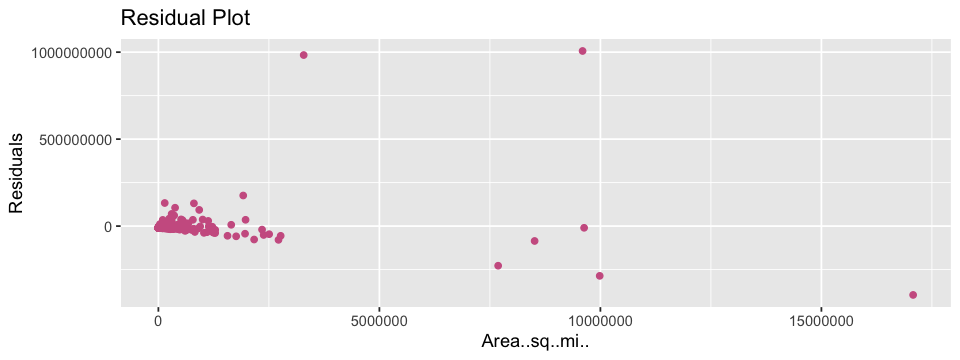

In [28]:
data[,'Residuals']<-lm(data[,'Population']~data[,'Area..sq..mi..'])$residuals
ggplot(data,aes(Area..sq..mi..,Residuals))+geom_point(colour='hotpink3')+ggtitle('Residual Plot')

This should worry us. A good model will have residuals which are *randomly dispersed* among the independent variables. This is not happening here. Clearly there are two huge outliers which are affecting our results (India and China) and our model is not dealing with very well. There are a few approaches we can take to deal with this starting  but for now we just note that it's a serious problem and sit tight until we get to <a href='#Dummy Variables'>Dummy Variables</a>.


 ### Log Regressions <a id='Log Regressions'></a>




So far we have only considered what are called **level-level** regressions, or regressions of the form `Population`$=\alpha + \beta \times$ `Area..sq..mi..`$+\epsilon_i$. Another examples would be `GDP....per.capita.`$=\alpha + \beta \times$ `Literacy....`$+\epsilon_i$. What we mean by level-level is that both the dependent variable and the independent variable are regressed exactly as we find them; we don't transform them. As you may have guessed from the title of this section, we can transform them using logarithms. This gives us *four* potential regressions: level-level, level-log, log-level and log-log. These alternate forms simply refer to which variables are being transformed in the order of dependent-independent. So a log-level regression would be:

$log($ `GDP....per.capita.`$)=\alpha + \beta \times$ `Literacy....`$+\epsilon_i$ and a level-log regression would be:

`Population`$=\alpha + \beta \times log($  `Area..sq..mi..`$)+\epsilon_i$. Hopefully you can see what a log-log regression would look like. The thing about log regressions is that they're really not that hard to use or understand. All we need to remember is 'percentage'. That's why we use them. Instead of interpretting our regression as the change in the dependent variable associated with a one unit increase in the independent variable we use log regressions to get interpretations like 'the change in the dependent variable associated with a one percent increase in the independent variable' (level-log), 'the percent change in the dependent variable associated with a one unit increase in the independent variable' (log-level) and the percent change in the dependent variable associated with a one percent increase in the independent variable' (log-log). These come in handy when we're using data which is not that normally distributed. We use `GDP....per.capita.` as an example:

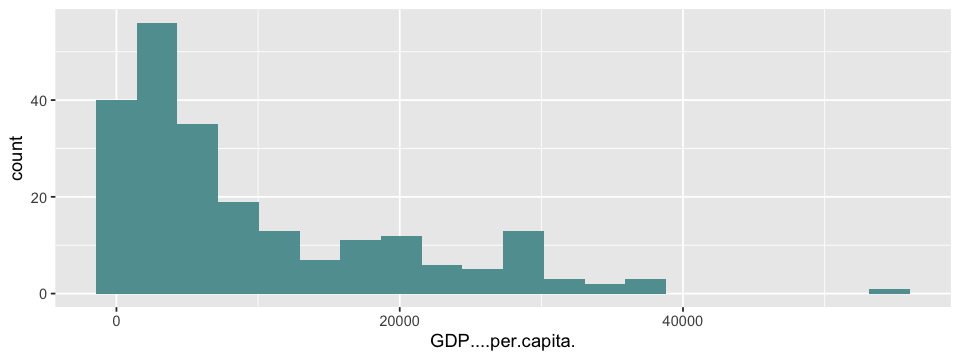

In [29]:
data1<-na.omit(data)
ggplot(data1,aes(GDP....per.capita.))+geom_histogram(fill='cadetblue',bins=20)

Clearly this is not a very normal-looking distribution, so we consider a log transformation:

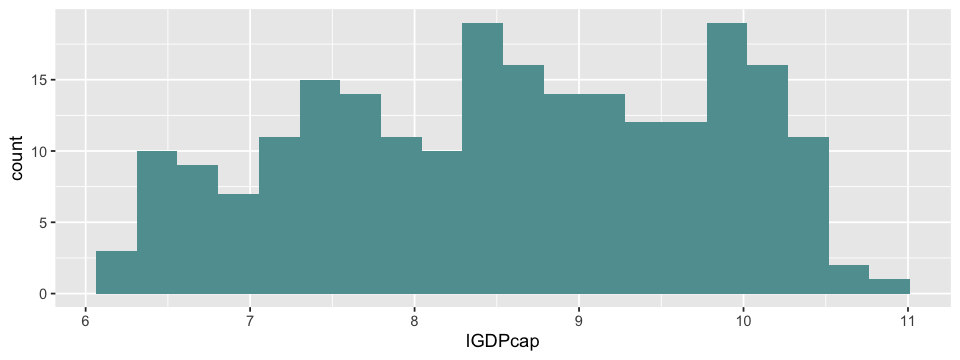

In [30]:
data[,'lGDPcap']<-log(data[,'GDP....per.capita.'])
data1[,'lGDPcap']<-log(data1[,'GDP....per.capita.'])
ggplot(data1,aes(lGDPcap))+geom_histogram(fill='cadetblue',bins=20)

Much better! So we think this variable is ripe for a log tranformation. Before we can run the log-level regression:
```r 
lm(data1[,'lGDPcap']~data1[,'Literacy....'])
``` 
we need to consider one thing, what our data looks like: 

In [31]:
head(data[,'lGDPcap'],10)
head(data[,'Literacy....'],10)

[1] 6.551080 8.411833 8.699515 8.987197 9.852194 7.549609 9.059517 9.305651
 [9] 9.323669 8.160518

[1] 36,0  86,5  70,0  97,0  100,0 42,0  95,0  89,0  97,1  98,6 
141 Levels:  100,0 17,6 26,6 31,4 35,9 36,0 37,8 40,1 40,2 40,4 40,9 ... 99,9

Our `lGDPcap` variable is fine but our `Literacy....` is very not fine. It contains commas! This means R will interpret these values as characters instead of numerics. We need to 'clean' it before it it can be used in a regression. To do this we use the `gsub()` command to substitute the commas for nothing, in essence deleting them. Then we can simply rewrite the existing data using `as.numeric()`:

In [32]:
data[,'Literacy....']<-as.numeric(gsub(',','',data[,'Literacy....']))/10
data1[,'Literacy....']<-as.numeric(gsub(',','',data1[,'Literacy....']))/10
head(data[,'Literacy....'],10)

[1]  36.0  86.5  70.0  97.0 100.0  42.0  95.0  89.0  97.1  98.6

Excellent. Now let's run that regression:

In [33]:
data2<-na.omit(data[c('Literacy....','lGDPcap')])
lm(data2[,'lGDPcap']~data2[,'Literacy....'])$coefficients

(Intercept) data2[, "Literacy...."] 
             5.17898803              0.04081297

The intercept doesn't really help us very much but what does is the coefficient on `Literacy....`. We interpret this as a one unit increase in literacy results in a 4.081% increase in GDP per Capita, which is really useful to know! We can get a better sense of `Literacy....` from its summary: 

In [34]:
summary(data2[,'Literacy....'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.60   70.60   92.50   82.84   98.00  100.00 

So we can be pretty sure it refers to the literacy rate of the population. This refers to the proportion of the population who are literate. So a one unit increase in the literacy rate means a one percent increase in the share of the population who are literate. Therefore our coefficient on `Literacy....` is telling that every extra percent increase in the literacy rate is associated with a 4.081% increase in GDP per Capita. We can see what this means visually below, adding R$^2$ to our graph using `bquote()` to call the R$^2$ we calculate:

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”

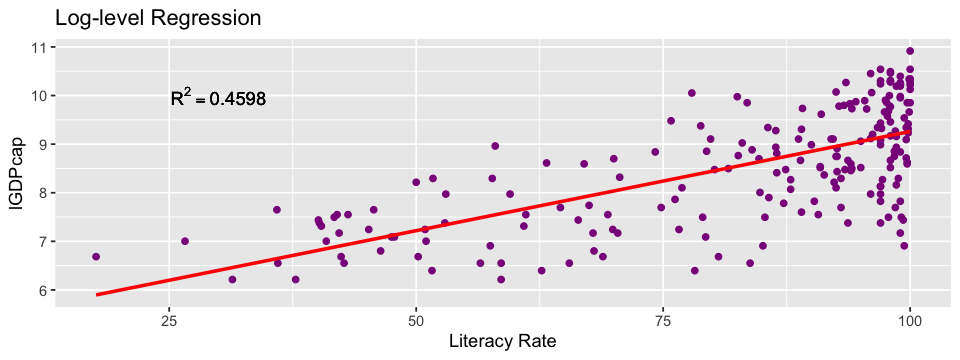

In [35]:
r_2<-round(summary(lm(data2[,'lGDPcap']~data2[,'Literacy....']))$r.squared,4)
eq <- bquote(R^2 == .(r_2))
ggplot(data2, aes(Literacy....,lGDPcap))+geom_point(colour='magenta4')+
scale_y_continuous(labels = comma)+geom_smooth(method='lm',se=F,colour='red')+
ggtitle('Log-level Regression')+annotate(geom="text", x = 30, y = 10, label = eq)+xlab('Literacy Rate')

We can check our residuals to see what the fit of this model looks like:

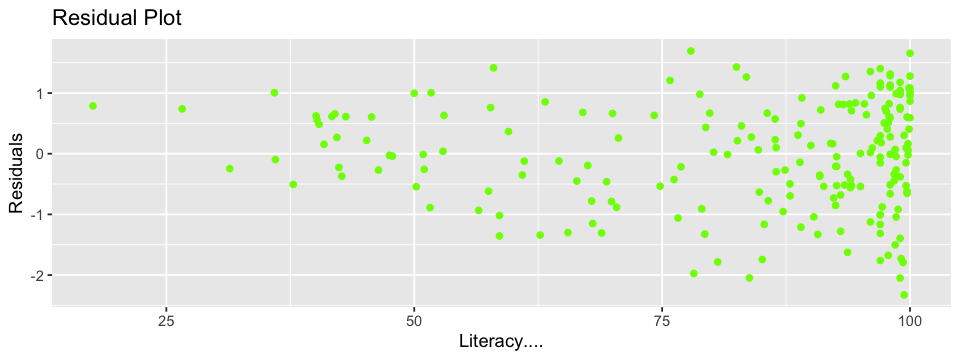

In [36]:
data2[,'Residuals']<-lm(data2[,'lGDPcap']~data2[,'Literacy....'])$residuals
ggplot(data2,aes(Literacy....,Residuals))+geom_point(colour='lawngreen')+ggtitle('Residual Plot')

This is *much nicer* than before. We defintely don't have a completely random dispersion of residuals as we can see there is quite a lot of bunching around the 95-100 mark but still this regression has done a much better job of fitting the data. We'll have to wait until Econometrics II to figure out what's the problem with this bunching and what to do about it.

 ### Multivariate Regression <a id='Multivariate Regression'></a>



Up until now we have considered cases of only one independent variable but there's no reason we can't add more. Once we do we will have created a multivariate regression, like $log($ `GDP....per.capita.`$)=\alpha + \beta_1 \times$ `Literacy....`$+ \beta_2 \times$ `Agriculture`$+\epsilon_i$ which we run now:

In [37]:
data[,'Agriculture']<-as.numeric(gsub(',','',data[,'Agriculture']))/10
lm(data[,'lGDPcap']~data[,'Literacy....']+data[,'Agriculture'])$coefficients

(Intercept) data[, "Literacy...."]  data[, "Agriculture"] 
            6.25320342             0.03247133            -0.03537164

So what does this regression tell us? Once again we shouldn't pay much attention to the intercept. The coefficients tell us that ***for a fixed literacy rate*** each unit (percent) change in the proportion of agriculture is associated with 3.537% *decrease* in GDP per capita. This part about a fixed literacy rate is crucial. In multivariate regressions coefficients can only be interpretted as changing while holding all the other variables fixed. This allows us to *control for* changes in the other variables. 

The trouble with multivariate regressions is that once we get over 3 variables we can't use scatterplots to visualise all our data at once like we did before. We'll see next term that Python *can* handle 3D plots and a lot more but right now we're going to have to made do with just 2 dimensions. So let's plot the 3 different positions of our 3D plot in 2 dimensions. We use the `layout_matrix` attribute to get a better grid.

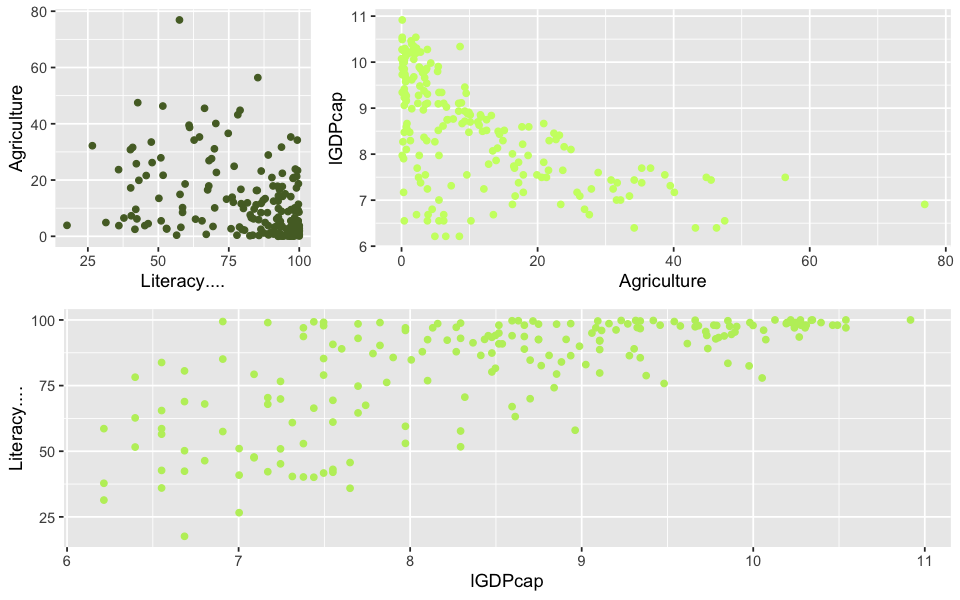

In [38]:
library(gridExtra)
options(repr.plot.width=8, repr.plot.height=5)
data3<-na.omit(data[c('lGDPcap','Literacy....','Agriculture')])
y1<-ggplot(data3,aes(Literacy....,Agriculture))+geom_point(colour='darkolivegreen')
y2<-ggplot(data3,aes(Agriculture,lGDPcap))+geom_point(colour='darkolivegreen1')
y3<-ggplot(data3,aes(lGDPcap,Literacy....))+geom_point(colour='darkolivegreen2')
grid.arrange(y1,y2,y3,ncol=2,  layout_matrix = rbind(c(1, 2, 2),c(3, 3, 3)))

This is what our 3D graph would have looked like from 'above' and the two sides and unfortunately it's not as helpful as we might have hoped. Instead we are going to have to rely on a little more analysis and a little less visualisation. The first big question is  "What's changed from our bivariate setting"? We had two estimators in our bivariate (with a constant) case, and so to get $\hat{\alpha}$ and $\hat{\beta}$ we had to solve $argmin_\hat{\alpha} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2$ and $argmin_\hat{\beta} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta} x_i)^2$ respectively. In the case of two regressors (like `GDP....per.capita.` and `Literacy....`) and a constant we therefore have to solve three minimisation problems to get $\hat{\alpha}$, $\hat{\beta}_1$ and $\hat{\beta}_2$ :

$argmin_\hat{\alpha} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})^2$ to get $\hat{\alpha}$, 

$argmin_\hat{\beta_1} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})^2$ to get $\hat{\beta}_1$ and 

$argmin_\hat{\beta_2} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})^2$ to get $\hat{\beta}_2$

This might seem like a natural approach but quite quickly it becomes extremely tedious, as each extra variable implies a new equation. A much simpler approach is to just use matrix algebra. To do this we turn our independent observations into a vector, our dependent variables into a matrix and our error terms into another vector. Practically this means: 


$y=\pmatrix{y_1  \cr y_2 \cr \vdots \cr y_n \cr}$, 

$X=\pmatrix{ 1 & x_1 & x_2 & \cdots & x_k}$ where $1,x_1, x_2,..., x_k$ are the vectors: $\pmatrix{1  \cr 1 \cr \vdots \cr 1 \cr}$, $\pmatrix{x_{11}  \cr x_{21} \cr \vdots \cr x_{n1} \cr}$, $\pmatrix{x_{12}  \cr x_{22} \cr \vdots \cr x_{n2} \cr}$,..., $\pmatrix{x_{1k}  \cr x_{2k} \cr \vdots \cr x_{nk} \cr}$

and $\epsilon=\pmatrix{\epsilon_{1}  \cr \epsilon_{2} \cr \vdots \cr \epsilon_{n} \cr}$ 

Before we go any further let's see an example of this applied to our previous regression: $log($ `GDP....per.capita.`$)=\alpha + \beta_1 \times$ `Literacy....`$+ \beta_2 \times$ `Agriculture`$+\epsilon_i$ regresssion as an example. In this case our $y$ dependent variable is simply the dataframe containing `GDP....per.capita.` and our $X$ matrix of independent variables is the dataframe containing a column of ones (you'll see in a moment how and why we do this) and then the columns `Literacy....` and `Agriculture`, so:

In [39]:
data3<-na.omit(data[c('GDP....per.capita.','Agriculture','Literacy....')])



In [40]:
data3<-na.omit(data[c('GDP....per.capita.','Agriculture','Literacy....')])
y<-log(data3['GDP....per.capita.'])
X<-data.frame(sample(1,nrow(data3),replace=T))
X['Literacy']<-data3['Literacy....']
X['Agriculture']<-data3['Agriculture']
colnames(y)<-c('y')
colnames(X)<-c('1','x1','x2')
head(y,10)
head(X,10)

,y
,<dbl>
1,6.551080
2,8.411833
3,8.699515
6,7.549609
7,9.059517
8,9.305651
9,9.323669
10,8.160518
11,10.239960


1,x1,x2
<int>,<dbl>,<dbl>
1,36.0,3.8
1,86.5,23.2
1,70.0,10.1
1,42.0,9.6
1,95.0,0.4
1,89.0,3.8
1,97.1,9.5
1,98.6,23.9
1,97.0,0.4


These are our new 'variables', a vector and a matrix. We can never truly know our error terms so we can't compute them or use R with them at all but we'll get a vector/dataframe estimating them shortly. What about our coefficients $\hat{\alpha}$, $\hat{\beta}_1$ and $\hat{\beta}_2$? Well hopefully you're not shocked to find that these are going to be found in a vector too which has the general form:


$\beta=\pmatrix{ \alpha \cr \beta_1 \cr \beta_2 \cr \vdots \cr \beta_k \cr}$, so in the above example it is just $\beta=\pmatrix{ \alpha \cr \beta_1 \cr \beta_2}$

This is where our Linear Algebra revision comes in handy. X is a $227 \times 3$ matrix, so it can only be multiplied by a $3 \times n$ matrix, where n can be any integer. We know that our vector of coefficients must be a vector so therefore it must be of size $3 \times 1$! If it's not clear *why* we're multiplying $X$ by $\beta$ consider that when we do we get the vector $X\beta=\pmatrix{ \alpha+\beta_1 x_{11} + \beta_2 x_{12} \cr \alpha+\beta_1 x_{21} + \beta_2 x_{22} \cr \alpha+\beta_1 x_{31} + \beta_2 x_{32}  \cr \vdots \cr\alpha+\beta_1 x_{n1} + \beta_2 x_{n2}  \cr}$ where $n=227$. Notice what happened when we multiplied the intercept by that weird vector of ones? Each term got an intercept! Hopefully why we included one makes more sense. If the form of this expression seems somewhat familiar then note that:

$y-X\beta=\pmatrix{ y_1-\alpha-\beta_1 x_{11} - \beta_2 x_{12} \cr y_2-\alpha-\beta_1 x_{21} - \beta_2 x_{22} \cr y_3-\alpha-\beta_1 x_{31} - \beta_2 x_{32}  \cr \vdots \cr y_n-\alpha-\beta_1 x_{n1} - \beta_2 x_{n2}  \cr}$ and that $(y-X\beta)'(y-X\beta)=\sum\limits_{i=1}^{n}(y_i-\alpha -\beta_1 x_{i1}-\beta_2 x_{i2})^2$

If this isn't mind-blowing to you just yet then remember where we came from: we were trying to solve problems which looked like $argmin_\hat{\alpha} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})^2$. We now know that this is exactly the same as writing $argmin_\hat{\beta} (y-X\hat{\beta})'(y-X\hat{\beta})$ and then taking the first element in the solution vector! All that linear algebra was not in vain!

So what would the coefficient vector look like in this case? Well:


In [41]:
reg<-lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....']+data3[,'Agriculture'])
beta_hat<-data.frame(c(reg$coefficients[1],reg$coefficients[2],reg$coefficients[3]))
colnames(beta_hat)<-c('beta_hat')
rownames(beta_hat)<-c('alpha_hat','beta1_hat','beta2_hat')

In [42]:
beta_hat

,beta_hat
,<dbl>
alpha_hat,6.25320342
beta1_hat,0.03247133
beta2_hat,-0.03537164


Why? Well we note that the solution to each of the three equations from before was:

$argmin_\hat{\alpha} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})^2 \equiv \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})=\sum\limits_{i=1}^{n}\hat{\epsilon_i}=0$, 

$argmin_\hat{\beta_1} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})^2 \equiv \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})x_{i1}=\sum\limits_{i=1}^{n}\hat{\epsilon_i} x_{i1}=0$ and 

$argmin_\hat{\beta_2} \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})^2 \equiv \sum\limits_{i=1}^{n}(y_i-\hat{\alpha} -\hat{\beta}_1 x_{i1}-\hat{\beta}_2 x_{i2})x_{i2}=\sum\limits_{i=1}^{n}\hat{\epsilon_i} x_{i2}=0$

These are called the 'normal equations', and in matrix form this is just:

$X'\hat{\epsilon}=0$

We call the 'fitted values' $\hat{y}=X \hat{\beta}$ and the 'residuals' $\hat{\epsilon}=y-\hat{y}$ so therefore $X'\hat{\epsilon}=X'(y-X\hat{\beta})=0$ and so we get $\hat{\beta}=(X'X)^{-1}X'y$. How does this hold up? Let's use R's `data.matrix()` function to convert dataframes into matricies: (remember transpose is `t()` and inverse is `solve()`):

In [43]:
a<-data.matrix(X)
b<-data.matrix(y)
bet<-data.matrix(beta_hat)
solve(t(a)%*%a)%*%t(a)%*%b
beta_hat

,y
1,6.25320342
x1,0.03247133
x2,-0.03537164


,beta_hat
,<dbl>
alpha_hat,6.25320342
beta1_hat,0.03247133
beta2_hat,-0.03537164


And there we have it! $\hat{\beta}=(X'X)^{-1}X'y$ well and truly is the vector of our coefficients! All this might seem like a lot of effort for nothing and don't worry we're *never* going to go through this much effort to find regression coefficients, but understanding the fundamentals of this approach is going to make Econometrics II and IV much more intuitive and easy to get a handle on. Also we got dragged through all that Linear Algebra in first year, why not see what it's useful for! Before we go on a word of consolation is in order: this notebook gets easier, not harder. We just *had* to cover the previous stuff at some point to show you how Linear Algebra ties into regresssion. 

### Adjusted-R$^2$ <a id='aAdjusted R^2'></a>




We've already covered R$^2$, but what we couldn't cover until now is what happens to R$^2$ when we add extra variables. Let's find out:

In [44]:
data[,'Service']<-as.numeric(gsub(',','',data[,'Service']))/10
data[,'Phones..per.1000.']<-as.numeric(gsub(',','',data[,'Phones..per.1000.']))/10
data[,'Arable....']<-as.numeric(gsub(',','',data[,'Arable....']))/10
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']))$r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']))$r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']))$r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']))$r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']+data[,'Service']))$r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']+data[,'Service']+data[,'Phones..per.1000.']))$r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']+data[,'Service']+data[,'Phones..per.1000.']+data[,'Arable....']))$r.squared

[1] 0.2633163

[1] 0.3768696

[1] 0.3768853

[1] 0.3801782

[1] 0.4149152

[1] 0.7453872

[1] 0.7467985

Hopefully you get the picture, it's not going down. No matter what we do, it isn't going down. This isn't just a fluke. We literally could have picked any variables in any regression, added more and been *absolutely certain* that R$^2$ wouldn't go down. Why? We're not going to go into any proofs here but the short answer is two things: because the definition of R$^2$ and OLS. We know that $R^2=SSE/SST$. The term $SSE$ is the amount of the variance in the dependent variable we can *explain* with the model. So if we add new a regressor and is doesn't explain the variance in the dependent variable better than the old model then by OLS this regressor will just have a coefficient of 0. Hypothetically let's say it didn't. Then we could just make the coefficient 0 and the fit would improve. But this would mean OLS hadn't done its job, so it could never happen! This is bad.

It's bad because we could just 'spam' variables into our model to get any kind of R$^2$ we wanted. The solution is adjusted-R$^2$, or $\bar{R}^2$. Adjusted-R$^2$ is defined as: $1- \dfrac{SSR/(n-k-1)}{SST/(n-1)}$. By $n$ and $k$ we are referring to the number of observations and the variables respectively. $(n-k-1)$ and $(n-1)$ are also known as our 'degrees of freedom' or the amount of dimensions in which our regression can still vary.

In [45]:
SSR<-sum((lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....']+data3[,'Agriculture'])$residuals)^2)
SST<-(nrow(data3)-1)*var(log(data3[,'GDP....per.capita.']))

In [46]:
summary(lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....']+data3[,'Agriculture']))$r.squared
summary(lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....']+data3[,'Agriculture']))$adj.r.squared
1-(SSR/(nrow(data3)-2-1))/(SST/(nrow(data3)-1))

[1] 0.5893266

[1] 0.5851361

[1] 0.5851361

So $\bar{R}^2$ can be calculated pretty easily. What's the advantage of $\bar{R}^2$? Well it factors in the parsimony of the model, or how well it balances fit with number of regressors. To see this more practically lets repeat our previous example but for $\bar{R}^2$: 

In [47]:
data[,'Service']<-as.numeric(gsub(',','',data[,'Service']))/10
data[,'Phones..per.1000.']<-as.numeric(gsub(',','',data[,'Phones..per.1000.']))/10
data[,'Arable....']<-as.numeric(gsub(',','',data[,'Arable....']))/10
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']))$adj.r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']))$adj.r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']))$adj.r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']))$adj.r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']+data[,'Service']))$adj.r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']+data[,'Service']+data[,'Phones..per.1000.']))$adj.r.squared
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']+data[,'Service']+data[,'Phones..per.1000.']+data[,'Arable....']))$adj.r.squared

[1] 0.2597574

[1] 0.3705111

[1] 0.3672989

[1] 0.3673984

[1] 0.3996786

[1] 0.7373042

[1] 0.7373708

Miraculous? Maybe not, but certainly positive! Our $\bar{R}^2$ falls slightly from the second to third regressions! In practice we should really be using $\bar{R}^2$ rather than $R^2$ to make our results more convincing to other economists. 

The last point on R$^2$ (or $\bar{R}^2$) is that it is useful, but nowhere near as useful as people think. R$^2$ is useful to compare regressions *using the same data*. The second we try and compare R$^2$'s from different datasets, different branches of economics or even different disciplines we get some ridiculous results. In some areas an R$^2$ of 0.2 would constitute very strong evidence and in others it would be laughable to present anything with an R$^2$ below 0.999. It just depends!

### Dummy Variables <a id='Dummy Variables'></a>





Dummy variables (AKA indicator variables) are kind of like Bernoulli variables; they can only be 1 or 0. Unfortunately there really isn't much more to them than that. Let's see an example: 

In [73]:
data[,'BillClub']<-(data[,'Country']=='India '|data[,'Country']=='China ')
data[,'BillClub']<-as.numeric(data[,'BillClub'])
summary(data[,'BillClub'])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.008811 0.000000 1.000000 

In this case `BillClub` is a dummy variable which represents whether a country has a population greater than one billion. As expected it is made up of only 0's and 1's. Let's see what happens when we include it in a regression:

In [74]:
lm(data[,'Population']~data[,'Area..sq..mi..']+data[,'BillClub'])$coefficients

(Intercept) data[, "Area..sq..mi.."]       data[, "BillClub"] 
          11160384.89407                 13.04689         1109450802.42817

It may be a little surprising to see a variable with a coefficient of 1.1 billion but it makes sense! In a sense what we're doing is running two regressions, one for all the countries with populations lower than a billion and one for populations greater than a billion. These are:

`Population`$=\alpha + \beta \times$ `Area..sq..mi..`$+\epsilon_i$ and

`Population`$=\alpha +\gamma+ \beta \times$ `Area..sq..mi..`$+\epsilon_i$ 

where $\gamma$ is the coefficient of `BillClub`. So our parameter estimates are $\hat{\alpha}=11160384.89,$ $\hat{\beta}=13.04$ and $\hat{\gamma}=1109450802.42$. Clearly both these regressions have the same coefficient on `Area..sq..mi..`, it is just their constant which changes. Let's see how that looks graphically compared to our previous regression using the `abline()` function to plot our regression manually from their coefficients:

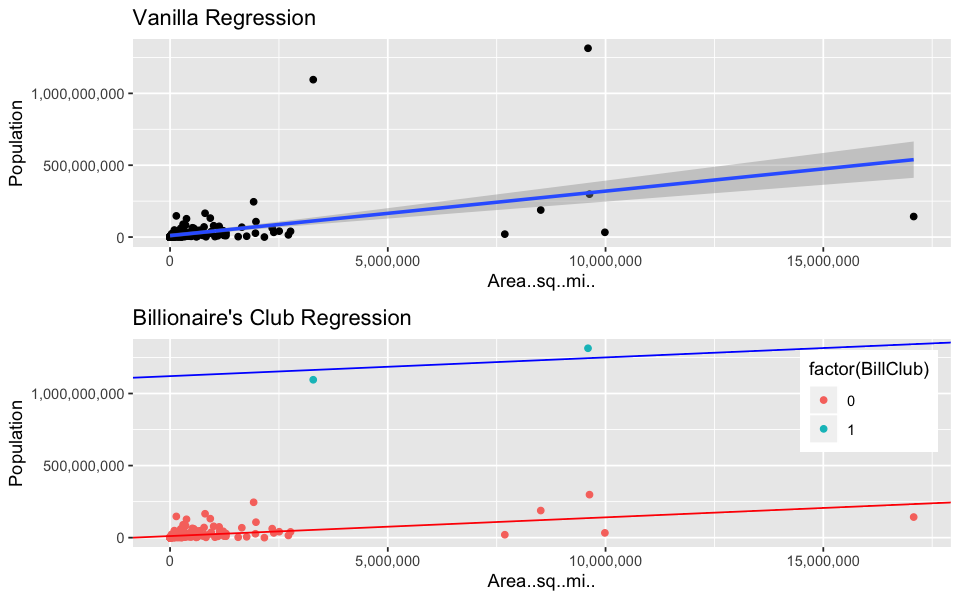

In [75]:
options(repr.plot.width=8, repr.plot.height=5)
reg<-lm(data[,'Population']~data[,'Area..sq..mi..']+data[,'BillClub'])
y1<-ggplot(data, aes(x=Area..sq..mi..,y=Population))+geom_point()+
scale_x_continuous(labels = comma)+scale_y_continuous(labels = comma)+geom_smooth(method='lm',se=F)+ggtitle("Vanilla Regression")
y2<-ggplot(data, aes(x=Area..sq..mi..,y=Population,colour=factor(BillClub)))+geom_point()+
scale_x_continuous(labels = comma)+scale_y_continuous(labels = comma)+
geom_abline(intercept=reg$coefficients[1],slope=reg$coefficients[2],colour='red')+
geom_abline(intercept=reg$coefficients[1]+reg$coefficients[3],slope=reg$coefficients[2],colour='blue')+ggtitle("Billionaire's Club Regression")+
theme(legend.position = c(0.9, 0.7))
grid.arrange(y1,y2)

Waaay better right? We're finally starting to account for those huge outliers! Let's see if we solved our residual problem too:

Warning message:
“Removed 2 rows containing missing values (geom_point).”

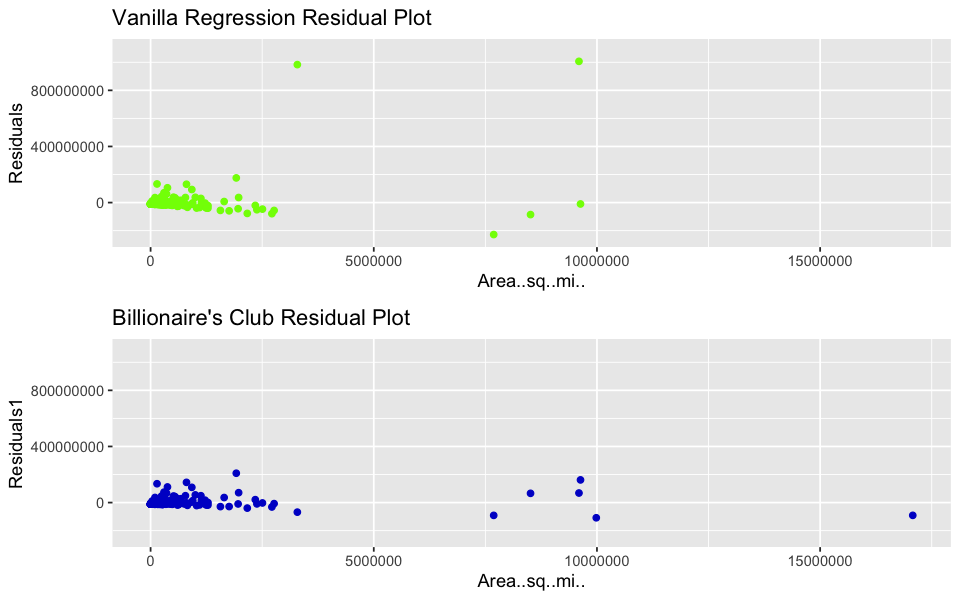

In [76]:
data[,'Residuals1']<-lm(data[,'Population']~data[,'Area..sq..mi..']+data[,'BillClub'])$residuals
y1<-ggplot(data,aes(Area..sq..mi..,Residuals))+geom_point(colour='chartreuse')+ggtitle('Vanilla Regression Residual Plot')+ylim(-250000000,1100000000)
y2<-ggplot(data,aes(Area..sq..mi..,Residuals1))+geom_point(colour='blue3')+ggtitle("Billionaire's Club Residual Plot")+ylim(-250000000,1100000000)
grid.arrange(y1,y2,ncol=1)

Waaaay better again! See how much we can do with dummy variables! What does R$^2$ have to say?

In [77]:
summary(lm(data[,'Population']~data[,'Area..sq..mi..']))$r.squared
summary(lm(data[,'Population']~data[,'Area..sq..mi..']+data[,'BillClub']))$r.squared

[1] 0.220886

[1] 0.9238182

Chalk and cheese. We've clearly solved a big problem by adding this indicator variable. 

  ### Interactions<a id='Interactions'></a>



We saw before that by adding a dummy variable we can run two regressions in one. However these regressions will always have the same slope coefficients - dummy variables only lead to new constants. Interactions are a way to let our slope coefficients be different instead (or as well if we include a dummy variable!). In practice interaction variables are just two regular variables multiplied together. For example maybe we want to run a regression where the slope coefficient for the relationship between literacy and GDP per capita can be different for agricultural countries than it is for non-agricultural countries. Say we define 'agricultural' countries as countries in the top quartile of agriculture, so:

In [78]:
summary(na.omit(data[,'Agriculture']))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.65    5.50   10.73   16.35   76.90 

Then we could create a dummy variable `AgQ4`: 

In [79]:
data[,'AgQ4']<-as.numeric(data[,'Agriculture']>=16.35)

And use an interaction variable of `AgQ4` and `Literacy....` to run the following regression:

In [80]:
lm(log(data[,'GDP....per.capita.'])~data[,'Literacy....']+data[,'AgQ4']+data[,'Literacy....']*data[,'AgQ4'])$coefficients

(Intercept)                data[, "Literacy...."] 
                           4.90138643                            0.04637104 
                       data[, "AgQ4"] data[, "Literacy...."]:data[, "AgQ4"] 
                           1.78466289                           -0.03498934

Why include the original variables if we already are including an interaction? Well the whole point of interactions that they let our initial variables have different slopes. If we didn't include the initial variables this would defeat the whole purpose of the interaction! So we've run the regression:

$log($ `GDP....per.capita.` $)=\alpha + \beta_1$ `Literacy....` $+ \beta_2 $ `AgQ4`+ $ \beta_3 $ `Literacy....`$\times$ `AgQ4` +$\epsilon_i$

And got $\hat{\alpha}=4.901$ , $\hat{\beta_1}=0.046$ , $\hat{\beta_2}=1.784$ , $\hat{\beta_3}=-0.034$

In essence this is still two regressions in one, but now our slope can change too. What does it look like? Let's see:

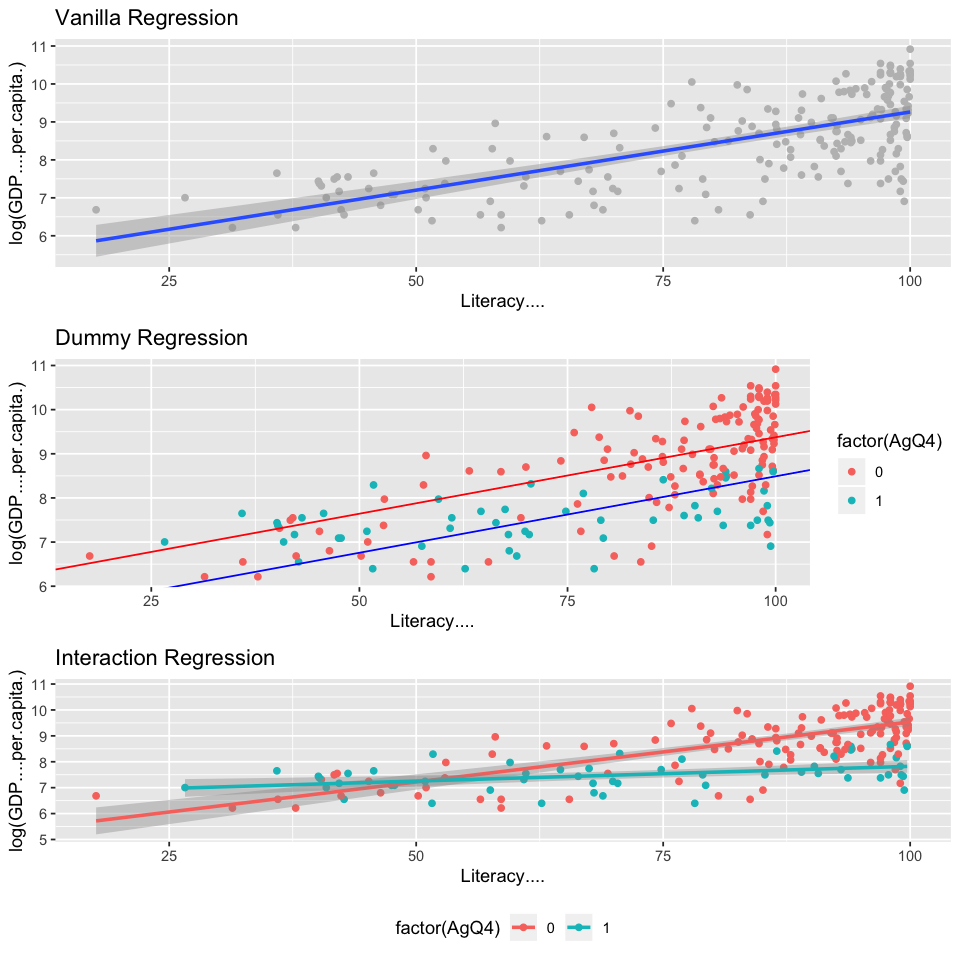

In [81]:
data3<-na.omit(data[c('GDP....per.capita.','Literacy....','AgQ4')])
reg<-lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....']+data3[,'AgQ4'])
options(repr.plot.width=8, repr.plot.height=8)
y1<-ggplot(data3, aes(x=Literacy....,y=log(GDP....per.capita.)))+geom_point(colour='grey')+
scale_x_continuous(labels = comma)+scale_y_continuous(labels = comma)+geom_smooth(method='lm',se=F)+ggtitle("Vanilla Regression")
y2<-ggplot(data3, aes(x=Literacy....,y=log(GDP....per.capita.),colour=factor(AgQ4)))+geom_point()+
geom_abline(colour='red',intercept=reg$coefficients[1],slope=reg$coefficients[2])+
geom_abline(colour='blue',intercept=(reg$coefficients[1]+reg$coefficients[3]),slope=reg$coefficients[2])+
scale_x_continuous(labels = comma)+scale_y_continuous(labels = comma)+ggtitle("Dummy Regression")
y3<-ggplot(data3, aes(x=Literacy....,y=log(GDP....per.capita.),colour=factor(AgQ4)))+geom_point()+
scale_x_continuous(labels = comma)+scale_y_continuous(labels = comma)+geom_smooth(method='lm',se=F)+ggtitle("Interaction Regression")+
theme(legend.position="bottom")
grid.arrange(y1,y2,y3)

We see that the slope for agricultural countries is much lower than that for non-agricultural countries, suggesting that we do a better job of explaining the variance in our dependent variable (logGDP per capita) when we include an interaction for agricultural countries.

In [82]:
reg<-lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....'])
reg1<-lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....']+data3[,'AgQ4'])
reg2<-lm(log(data3[,'GDP....per.capita.'])~data3[,'Literacy....']+data3[,'AgQ4']+data3[,'Literacy....']*data3[,'AgQ4'])
summary(reg)$r.squared
summary(reg1)$r.squared
summary(reg2)$r.squared

[1] 0.46535

[1] 0.5597606

[1] 0.6262814

 ### t-tests <a id='t-tests'></a>




Up until now we have just assumed that the slopes we have seen mattered. We saw effects like a ~4% increase in GDP per capita for each level of income and just assumed that this was a result we should care about. The t-test is the statistical process we use for figuring out whether we actually should care about the results we observe or whether they could have been just as big (in absolute value terms) through random chance alone. Let's see what a t-test tells us about our previous conclusion; that an interaction term helped us explain our model better:

In [83]:
summary(reg2)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.90138643,0.302364804,16.210175,0.00000000000000000000000000000000000005502518
"data3[, ""Literacy....""]",0.04637104,0.003434966,13.499708,0.00000000000000000000000000000933109675363577
"data3[, ""AgQ4""]",1.78466289,0.470325929,3.794524,0.00019733705349874973975811409676595076234662
"data3[, ""Literacy....""]:data3[, ""AgQ4""]",-0.03498934,0.005938985,-5.891467,0.00000001654114684705092940421634092711122843


What are we seeing? The parameter estimates for $\hat{\alpha}$,$\hat{\beta}_1$,$\hat{\beta}_2$ and $\hat{\beta}_3$, their standard errors, t-values and p-values. Let's cover these last three in order. Standard error is an estimate of standard deviation. We don't know the sampling distribution for each of our estimators ($\hat{\alpha}$,$\hat{\beta}_1$,$\hat{\beta}_2$ and $\hat{\beta}_3$) so we have to use the data to make estimated ones. How? Well we use matrix algebra to construct a 'correlation matrix', which is a square matrix representing the variance of each regressor on the main diagonal and the covariance of each regressor on the off-diagonals. It is of the form:


$var(\hat{\beta})=\pmatrix{var(\hat{\beta}_1)&cov(\hat{\beta}_1,\hat{\beta}_2)&  \cdots& cov(\hat{\beta}_1,\hat{\beta}_n) \cr cov(\hat{\beta}_2,\hat{\beta}_1)&var(\hat{\beta}_2)&  \cdots& cov(\hat{\beta}_2,\hat{\beta}_n) \cr  \vdots& \vdots& \ddots &\vdots \cr cov(\hat{\beta}_n,\hat{\beta}_1)&cov(\hat{\beta}_n,\hat{\beta}_2) &  \cdots &  var(\hat{\beta}_n)\cr}$

To make this we use $\hat{\sigma}^2(X'X)^{-1}=\dfrac{\hat{\epsilon}'\hat{\epsilon}}{n-k}(X'X)^{-1}$ where $\hat{\epsilon}$ are our residuals. We've already covered a lot so we won't derive this formula but we can show that it holds for the previous dummy variable regression $log($ `GDP....per.capita.` $)=\alpha + \beta_1$ `Literacy....` $+ \beta_2 $ `AgQ4`  +$\epsilon_i$ as follows:

In [84]:
X<-data.frame(rep(1,nrow(data3)),data3['Literacy....'],data3['AgQ4'],data3['Literacy....']*data3['AgQ4'])
X<-data.matrix(X)
eps_hat<-data.matrix(reg2$residuals)
head(X,10)
head(eps_hat,10)

,rep.1..nrow.data3..,Literacy....,AgQ4,Literacy.....1
1,1,36.0,0,0.0
2,1,86.5,1,86.5
3,1,70.0,0,0.0
6,1,42.0,0,0.0
7,1,95.0,0,0.0
8,1,89.0,0,0.0
9,1,97.1,0,0.0
10,1,98.6,1,98.6
11,1,97.0,0,0.0
12,1,100.0,0,0.0


-0.01966352
0.74126615
0.55215555
0.70063907
-0.24711770
0.27724160
-0.08034531
0.35223313
0.84058252
0.73656073


In [85]:
sigma_hat_sqd<-as.numeric(t(eps_hat)%*%eps_hat)/(nrow(data3)-4)

In [86]:
sigma_hat_sqd*solve(t(X)%*%X)

,rep.1..nrow.data3..,Literacy....,AgQ4,Literacy.....1
rep.1..nrow.data3..,0.091424475,-0.00101740228,-0.091424475,0.00101740228
Literacy....,-0.001017402,0.00001179899,0.001017402,-0.00001179899
AgQ4,-0.091424475,0.00101740228,0.221206479,-0.00269104064
Literacy.....1,0.001017402,-0.00001179899,-0.002691041,0.00003527155


In [87]:
C<-summary(reg2)$sigma^2*summary(reg2)$cov.unscaled
C

,(Intercept),"data3[, ""Literacy....""]","data3[, ""AgQ4""]","data3[, ""Literacy....""]:data3[, ""AgQ4""]"
(Intercept),0.091424475,-0.00101740228,-0.091424475,0.00101740228
"data3[, ""Literacy....""]",-0.001017402,0.00001179899,0.001017402,-0.00001179899
"data3[, ""AgQ4""]",-0.091424475,0.00101740228,0.221206479,-0.00269104064
"data3[, ""Literacy....""]:data3[, ""AgQ4""]",0.001017402,-0.00001179899,-0.002691041,0.00003527155


And so we find our correlation matrix as expected! As mentioned before the diagonal contains our estimated variances for reach parameter so we simply find the square root of the diagonal elements to find our standard errors:

In [88]:
S<-data.frame(c(C[1,1]^0.5,C[2,2]^0.5,C[3,3]^0.5,C[4,4]^0.5))
colnames(S)<-'SEs'
S

SEs
<dbl>
0.302364804
0.003434966
0.470325929
0.005938985


Which should be exactly the same as our reported standard errors!

In [89]:
summary(reg2)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.90138643,0.302364804,16.210175,0.00000000000000000000000000000000000005502518
"data3[, ""Literacy....""]",0.04637104,0.003434966,13.499708,0.00000000000000000000000000000933109675363577
"data3[, ""AgQ4""]",1.78466289,0.470325929,3.794524,0.00019733705349874973975811409676595076234662
"data3[, ""Literacy....""]:data3[, ""AgQ4""]",-0.03498934,0.005938985,-5.891467,0.00000001654114684705092940421634092711122843


Excellent! Then we find t-values by dividing our parameter estimates by their standard errors

In [90]:
T<-reg2$coefficients/S
colnames(T)<-'t-vals'
T

t-vals
<dbl>
16.210175
13.499708
3.794524
-5.891467


Not so bad, right? The p-values? These are just found by putting the t-values into a t-distribution with $n-k$ degreess of freedom, or in this case $199-4=195$ (the intercept is still a variable!). To find the t-values we use the `pt()` command and multiply it by two to get a two-tailed test (not forgetting to use absolute values to cope with the negative t-value):

In [91]:
p_vals<-data.frame(2*pt(abs(T[,1]),df=nrow(data3)-4,lower=FALSE))
colnames(p_vals)<-'p_vals'
p_vals

p_vals
<dbl>
0.00000000000000000000000000000000000005502518
0.00000000000000000000000000000933109675363577
0.00019733705349874973975811409676595076234662
0.00000001654114684705092940421634092711122843


And there we have it! t-tests for all our regressors. But why do we do t-tests? To figure out if our coefficient could have simply occured by random chance! Our above t-tests show us that we should expect parameter estiamtes ($\hat{\alpha}$'s etc) this large (in absolute value terms) 0.000000000000000000000000000000000005502518% of the time, 0.000000000000000000000000000933109675363577% of the time, 0.019733705349874973975811409676595076234662% of the time and 000.000001654114684705092940421634092711122843% of the time repspectively. So we can easily reject the null hypotheses that $\alpha=0,\beta_1=0,\beta_2=0$ and $\beta_3=0$ at the 0.1% level, let alone the 5% level! So when would we not reject these nulls (**never** accept) and why? Let's take a look at the regression:

$log($ `GDP....per.capita.` $)=\alpha + \beta_1$ `Literacy....` $+ \beta_2 $ `Agriculture` + $\beta_3 $ `Population`+ $\beta_4 $ `Area..sq..mi..` +$\epsilon_i$

In [92]:
summary(lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..']))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-3674.581450344380,2887.204713368864,-1.2727125,0.204643251147133
"data[, ""Literacy....""]",195.517586834137,31.348514283318,6.2369012,0.000000002736434
"data[, ""Agriculture""]",-277.071940639947,48.254564851271,-5.7418804,0.000000035661374
"data[, ""Population""]",-0.000002798163,0.000005190796,-0.5390624,0.590461903218057
"data[, ""Area..sq..mi..""]",0.000348598016,0.000343371288,1.0152218,0.311264574813425


For both our last two variables `Population` and `Area..sq..mi..` we cannot reject the null hypotheses $\beta_3=0$ and $\beta_4=0$ at the 5% level. So they're useless right? We could just remove them from our regression? Wrong. To decide that we need to consider our last section on F-tests. All that we can say for sure is that these coefficients can't be interpretted as 'being associated with a $x$% change in GDP per capita'. We don't have evidence to say anything about them at a reasonable level of significance.

 ### F-tests <a id='F-tests'></a>



The F-test is like the t-test's older cousin. It helps us determine whether multiple null hypothesis can be rejected at the same time. The reason this can be extremely useful is that while t-test can only tell us about how a single variable behaves on its own, F-tests can tell us how multiple variables behave together. For example even though both `Population` and  `Area..sq..mi..` seem useless on their own they could be useful together, which the F-test will tell us. Let's test the null $\beta_3=\beta_4=0$ at the 5% level using an F-test with the package `car` and the function `linearHypothesis`. Note that we need to specify our regression differently here to actually explictly call the source of our data:

In [93]:
library(car)
reg<-lm(GDP....per.capita.~Literacy....+Agriculture+Population+Area..sq..mi..,data=data)
linearHypothesis(reg,c("Population=0",'Area..sq..mi..=0'))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
196,12717664204,NA,NA,NA,NA
194,12650137452,2,67526753,0.5177884,0.5966579


Essentially this is just running two regressions an 'unrestricted' regression and a 'restricted' one:

$log($ `GDP....per.capita.` $)=\alpha + \beta_1$ `Literacy....` $+ \beta_2 $ `Agriculture` + $\beta_3 $ `Population`+ $\beta_4 $ `Area..sq..mi..` +$\epsilon_i$ (unrestricted)  and

$log($ `GDP....per.capita.` $)=\alpha + \beta_1$ `Literacy....` $+ \beta_2 $ `Agriculture` + $\epsilon_i$ (restricted)

which produce two RSS's, the unrestricted RSS (URSS) and the restricted RSS (RRSS). The test statistic $\dfrac{(RRSS-URSS)/J}{URSS/(n-k)}$, where $J$ is the number of restrictions, is then distributed around the $F_{J,n-k}$ distribution which we can show as follows:

In [94]:
reg_R<-lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture'])
reg_U<-lm(data[,'GDP....per.capita.']~data[,'Literacy....']+data[,'Agriculture']+data[,'Population']+
data[,'Area..sq..mi..'])
RRSS<-sum(reg_R$residuals^2)
URSS<-sum(reg_U$residuals^2)
F<-((RRSS-URSS)/2)/(URSS/194)
F

[1] 0.5177884

As before we simply parse our F statistic into the F distribution and get our p-value:

In [95]:
1-pf(F,df1=2,df2=194)

[1] 0.5966579

Indicating we can't reject the null at the 5% (even 50%) level. So these two regressors *were* probably useless, but at least we now have the tools to check this in the future.

And so we come to the end of our first term! We really have covered a ***LOT*** of ground this term so don't feel bad if you haven't followed everything. If you've made it this far you've done well and hopefully you're starting to see just how useful R can be for economists!